# 🚀 Machine Learning Practice: 10 Guided Tasks & Assignments

Welcome, future AI expert! You've learned the fundamentals of Linear and Logistic Regression. Now it's time to put your skills to the test with real-world datasets.

This notebook contains 10 guided tasks. After each task, you will find a new **assignment** where you must apply the same techniques to a different dataset.

### Your Mission:
1.  **Complete the Guided Task:** Fill in the missing code in cells marked with `# Your code here`.
2.  **Complete the Assignment:** Use the skills you just practiced to build a new model from scratch in the assignment section.

Let's get started! 🔥

---
## 🏡 Task 1: Predicting House Prices (Linear Regression)

**Goal:** Predict the median house value in California districts.
**Dataset:** California Housing (from Scikit-learn).
**Techniques:** `StandardScaler`, basic data loading and evaluation.

In [1]:
# Step 1.1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1.2: Load the Data
# Scikit-learn datasets come in a special object. We need to create a pandas DataFrame.
housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['MedHouseVal'] = housing.target # This is our target variable

print("Dataset Shape:", df_housing.shape)
df_housing.head()

Dataset Shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Step 1.3: Data Preprocessing & Feature Scaling
# We'll scale our features to make the model perform better. StandardScaler standardizes features to have a mean of 0 and a variance of 1.

# Separate features (X) and target (y)
X = df_housing.drop('MedHouseVal', axis=1)
y = df_housing['MedHouseVal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# We only fit on training data to avoid data leakage from the test set!
X_train_scaled = scaler.fit_transform(X_train)

# Your code here: Transform the test data using the *same* scaler
X_test_scaled = scaler.transform(X_test)

In [4]:
# Step 1.4: Train the Linear Regression Model

# Your code here: Initialize the LinearRegression model
model = LinearRegression()

# Your code here: Fit the model on the SCALED training data
model.fit(X_train_scaled, y_train)

LinearRegression()

Mean Squared Error: 0.56
R-squared: 0.58


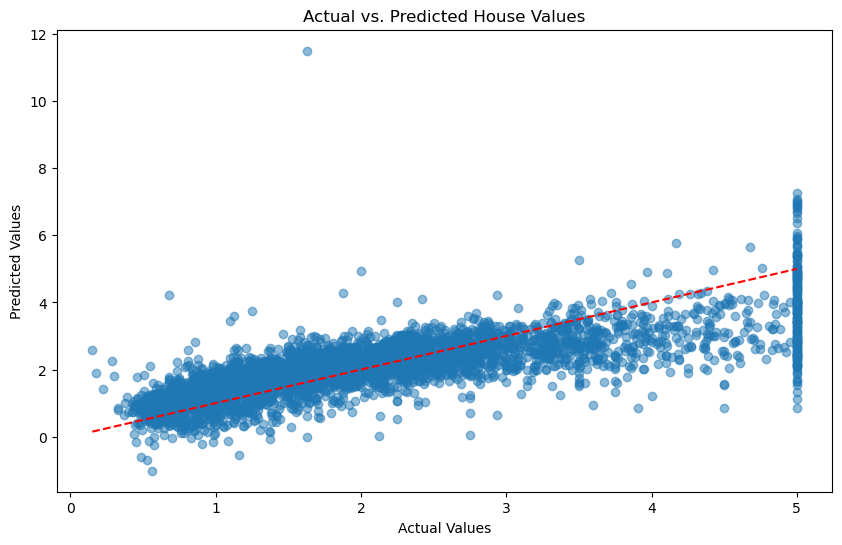

In [5]:
# Step 1.5: Evaluate the Model
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Perfect prediction line
plt.title('Actual vs. Predicted House Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [6]:
# Step 1.6: Predict on New User Input
def predict_new_house_price():
    print("\nEnter details for a new district to predict its median house value.")
    
    # Collect user input for each feature
    user_inputs = []
    for feature in X.columns:
        val = float(input(f"Enter {feature}: "))
        user_inputs.append(val)

    # Convert to numpy array and reshape
    input_array = np.array(user_inputs).reshape(1, -1)

    # Your code here: Scale the user's input using the SAME scaler from before
    input_scaled = scaler.transform(input_array)

    # Your code here: Predict using the trained model
    prediction = model.predict(input_scaled)

    print(f"\nPredicted Median House Value: ${prediction[0] * 100000:.2f}") # Target is in units of 100k

# Call the function to test it
# predict_new_house_price() # Uncomment to run

### ✍️ Assignment 1: Your Turn!

**Goal:** Predict disease progression in diabetes patients.
**Dataset:** Diabetes (from Scikit-learn).
**Your Task:** Replicate the entire pipeline from Task 1 on this new dataset. The steps are almost identical.

In [ ]:
# Assignment 1: Diabetes Prediction
from sklearn.datasets import load_diabetes

# Step 1: Load the data into a pandas DataFrame
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['progression'] = diabetes.target

# Step 2: Separate features (X) and target (y)
# Your code here


# Step 3: Split the data into training and testing sets
# Your code here


# Step 4: Initialize a StandardScaler and scale your training and testing data
# Your code here


# Step 5: Initialize and train a LinearRegression model
# Your code here


# Step 6: Make predictions on the test set and evaluate the model using R-squared
# Your code here


---
## 🚢 Task 2: Titanic Survival Prediction (Binary Logistic Regression)

**Goal:** Predict whether a passenger survived the Titanic disaster.
**Dataset:** Titanic (from Seaborn).
**Techniques:** Handling missing values with `.fillna()`, encoding categorical data with `pd.get_dummies()`.

In [10]:
# Step 2.1: Load Libraries and Data
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Seaborn makes it easy to load this classic dataset
df_titanic = sns.load_dataset('titanic')

print(df_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [11]:
# Step 2.2: Data Preprocessing
# Let's simplify and select a few features
df_titanic = df_titanic[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']].copy()

# Handle missing values
# We'll fill missing 'age' with the median age and drop the few missing 'embarked' rows.
median_age = df_titanic['age'].median()
df_titanic['age'].fillna(median_age, inplace=True)
df_titanic.dropna(inplace=True)

# Handle categorical values with one-hot encoding
# pd.get_dummies() converts categorical variables into dummy/indicator variables.
# For example, 'sex' (male/female) becomes two columns: 'sex_male' (1 or 0) and 'sex_female' (1 or 0).
# We set drop_first=True to avoid multicollinearity (redundant columns).
df_titanic = pd.get_dummies(df_titanic, columns=['sex', 'embarked'], drop_first=True)

print("Preprocessed Data Head:")
df_titanic.head()

Preprocessed Data Head:


C:\Users\Qasim\AppData\Local\Temp\ipykernel_10024\1571545479.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(median_age, inplace=True)


,survived,pclass,age,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,7.2500,True,False,True
1,1,1,38.0,71.2833,False,False,False
2,1,3,26.0,7.9250,False,False,True
3,1,1,35.0,53.1000,False,False,True
4,0,3,35.0,8.0500,True,False,True


In [12]:
# Step 2.3: Split Data and Train Model

# Your code here: Define features (X) and target (y)
# X should be all columns EXCEPT 'survived'
# y should be the 'survived' column
X = df_titanic.drop('survived', axis=1)
y = df_titanic['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Your code here: Initialize and train a LogisticRegression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       167
           1       0.69      0.73      0.71       100

    accuracy                           0.78       267
   macro avg       0.76      0.77      0.76       267
weighted avg       0.78      0.78      0.78       267



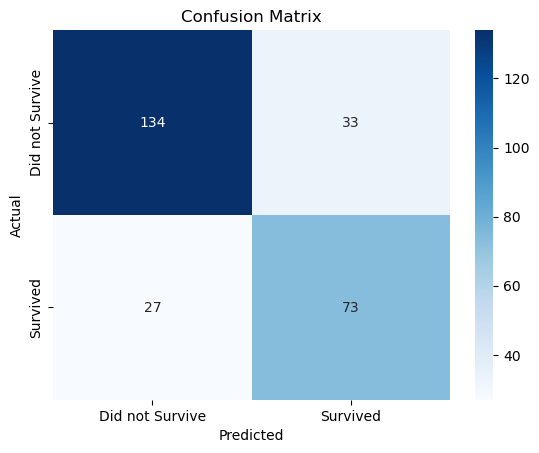

In [13]:
# Step 2.4: Evaluate the Model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize with a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not Survive', 'Survived'], yticklabels=['Did not Survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Step 2.5: Predict for a New Passenger
def predict_survival():
    pclass = int(input("Enter passenger class (1, 2, or 3): "))
    sex = input("Enter sex (male or female): ").lower()
    age = float(input("Enter age: "))
    fare = float(input("Enter fare paid: "))
    embarked = input("Enter port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton): ").upper()

    # Create a DataFrame from the input
    data = {
        'pclass': [pclass],
        'age': [age],
        'fare': [fare],
        'sex_male': [1 if sex == 'male' else 0],
        'embarked_Q': [1 if embarked == 'Q' else 0],
        'embarked_S': [1 if embarked == 'S' else 0]
    }
    input_df = pd.DataFrame(data)
    
    # Your code here: Make a prediction using the trained model
    prediction = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)[0]

    if prediction == 1:
        print(f"\nPrediction: Likely to SURVIVE (Probability: {proba[1]:.2f})")
    else:
        print(f"\nPrediction: Unlikely to SURVIVE (Probability: {proba[0]:.2f})")

# predict_survival() # Uncomment to run

### ✍️ Assignment 2: Your Turn!

**Goal:** Predict if an adult's income is greater than $50k/year.
**Dataset:** Adult Census Income (from UCI).
**Your Task:** This dataset has categorical features and missing values (marked with `?`). Use `fillna()` or `dropna()` and `pd.get_dummies()` just like in the Titanic example.

In [ ]:
# Assignment 2: Adult Income Prediction
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']

# Step 1: Load the data. Note the missing values are ' ?'. Use na_values=' ?'.
df_adult = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)

# Step 2: Preprocess the data
# Your code here: Drop rows with missing values for simplicity


# Your code here: Use pd.get_dummies on categorical columns. You can select a few like 'workclass', 'sex', 'race'.
# Remember to drop the original columns and set drop_first=True.


# Your code here: The target 'income' is text (<=50K, >50K). Convert it to 0s and 1s.
# Hint: df_adult['income'] = (df_adult['income'] == '>50K').astype(int)


# Step 3: Define X and y. Select only the numeric and newly created dummy columns for X.
# Your code here


# Step 4: Split data, train a LogisticRegression model, and evaluate its accuracy.
# Your code here


---
## ⚕️ Task 3: Predicting Medical Insurance Costs (Linear Regression)

**Goal:** Predict a person's medical insurance charges.
**Dataset:** Insurance (from a public CSV file).
**Techniques:** Using `pd.read_csv()`, feature crafting, `OneHotEncoder`.

In [ ]:
# Step 3.1: Load Libraries and Data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data from a URL
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df_insurance = pd.read_csv(url)

df_insurance.info()

In [ ]:
# Step 3.2: Feature Crafting & Preprocessing
# Let's create a new feature: 'bmi_over_30', which might be a strong indicator.
df_insurance['bmi_over_30'] = (df_insurance['bmi'] > 30).astype(int) # 1 if true, 0 if false

# Define which columns are categorical and which are numeric
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children', 'bmi_over_30']
target = 'charges'

# Create a preprocessing pipeline. This is a more advanced but powerful way to handle transformations!
# It applies different steps to different columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Scale numeric features
        ('cat', OneHotEncoder(drop='first'), categorical_features) # One-hot encode categorical features
    ])

X = df_insurance.drop(target, axis=1)
y = df_insurance[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3.3: Build the Full Pipeline and Train
# We combine the preprocessor and the model into a single pipeline.
# This ensures that the same transformations are applied consistently.

# Your code here: Create a Pipeline object
# It should have two steps: 
# 1. 'preprocessor' which is the preprocessor object we defined above
# 2. 'regressor' which is a LinearRegression() model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

# Train the entire pipeline
model_pipeline.fit(X_train, y_train)

In [ ]:
# Step 3.4: Evaluate the Model
# Your code here: Use the trained pipeline to make predictions on the test set
y_pred = model_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared on test data: {r2:.3f}")

In [ ]:
# Step 3.5: Predict for a New Person
# The beauty of the pipeline is that we can give it raw data, and it handles all preprocessing internally!
def predict_insurance():
    age = int(input("Enter age: "))
    sex = input("Enter sex (male/female): ")
    bmi = float(input("Enter BMI: "))
    children = int(input("Enter number of children: "))
    smoker = input("Is the person a smoker (yes/no): ")
    region = input("Enter region (e.g., southwest, southeast, northwest, northeast): ")

    # Create a DataFrame from the input
    # The column names MUST match the ones used in training
    new_data = pd.DataFrame([{
        'age': age, 'sex': sex, 'bmi': bmi, 'children': children,
        'smoker': smoker, 'region': region
    }])
    
    # Predict using the pipeline
    prediction = model_pipeline.predict(new_data)[0]
    print(f"\nPredicted Insurance Charge: ${prediction:.2f}")

# predict_insurance() # Uncomment to run

### ✍️ Assignment 3: Your Turn!

**Goal:** Predict a student's final grade (G3).
**Dataset:** Student Performance (from UCI).
**Your Task:** Use the `ColumnTransformer` and `Pipeline` method from Task 3 to build a regression model. This dataset has many categorical and numerical features.

In [ ]:
# Assignment 3: Student Performance Prediction
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student-mat.csv'

# Step 1: Load the data. Note the separator is ';'.
df_student = pd.read_csv(url, sep=';')

# Step 2: Define your features and target.
# Target is 'G3'. Use a mix of other columns for features.
# Your code here: Define lists for categorical_features and numerical_features
# e.g., categorical_features = ['sex', 'address', 'famsize', 'Mjob', 'Fjob']
# e.g., numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'G1', 'G2']


# Step 3: Create the ColumnTransformer preprocessor.
# Use StandardScaler for numeric features and OneHotEncoder for categorical features.
# Your code here


# Step 4: Define X and y, and split the data.
# Your code here


# Step 5: Create a Pipeline that combines your preprocessor and a LinearRegression model.
# Your code here


# Step 6: Fit the pipeline to the training data and evaluate its R-squared score on the test data.
# Your code here


---
## 🌸 Task 4: Iris Flower Classification (Multiclass Logistic Regression)

**Goal:** Classify an iris flower into one of three species.
**Dataset:** Iris (from Scikit-learn).
**Techniques:** Multiclass classification, interpreting `classification_report`.

In [ ]:
# Step 4.1: Load Libraries and Data
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris['species_name'] = df_iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df_iris.head()

In [ ]:
# Step 4.2: Split Data and Train Model
# This dataset is clean, so no major preprocessing is needed besides splitting.
X = df_iris[iris.feature_names] # Selecting features
y = df_iris['species'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # stratify ensures balanced classes in splits

# Your code here: Initialize a LogisticRegression model for multiclass classification.
# Hint: Use multi_class='multinomial' and a suitable solver like 'lbfgs'.
multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Your code here: Fit the model
multi_model.fit(X_train, y_train)

In [ ]:
# Step 4.3: Evaluate the Model
y_pred = multi_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

In [ ]:
# Step 4.4: Predict for a New Flower
def classify_new_iris():
    print("\nEnter the measurements of a new Iris flower:")
    sepal_l = float(input("Sepal Length (cm): "))
    sepal_w = float(input("Sepal Width (cm): "))
    petal_l = float(input("Petal Length (cm): "))
    petal_w = float(input("Petal Width (cm): "))

    input_data = [[sepal_l, sepal_w, petal_l, petal_w]]
    
    # Your code here: Use the trained multiclass model to predict the class index
    pred_index = multi_model.predict(input_data)[0]
    
    # Your code here: Get the class name using the index and iris.target_names
    pred_name = iris.target_names[pred_index]

    print(f"\nThe model predicts this flower is a: {pred_name.title()}")

# classify_new_iris() # Uncomment to run

### ✍️ Assignment 4: Your Turn!

**Goal:** Classify handwritten digits (0-9).
**Dataset:** Digits (from Scikit-learn).
**Your Task:** This is another clean, classic multiclass dataset. Apply the same multiclass logistic regression technique.

In [ ]:
# Assignment 4: Handwritten Digit Recognition
from sklearn.datasets import load_digits

# Step 1: Load the data
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Split the data. Use stratify=y because it's a classification problem.
# Your code here


# Step 3: Initialize and train a multiclass LogisticRegression model.
# Your code here


# Step 4: Evaluate the model with a classification_report.
# Your code here


---
## 🚗 Task 5: Predicting Fuel Efficiency (Linear Regression)

**Goal:** Predict the miles per gallon (MPG) of a car.
**Dataset:** Auto MPG (from UCI repository).
**Techniques:** Data cleaning, `dropna()`, handling a specific non-numeric value.

In [ ]:
# Step 5.1: Load Data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

df_auto = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

df_auto.info()

In [ ]:
# Step 5.2: Data Cleaning
# The 'Horsepower' column has 6 missing values. Since it's a small number, we can safely drop those rows.

# Your code here: Drop rows with any missing values from the DataFrame.
df_auto.dropna(inplace=True)

# The 'Origin' column is categorical but coded as numbers. Let's map them to readable names.
df_auto['Origin'] = df_auto['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

# Your code here: Apply one-hot encoding to the 'Origin' column.
# Use pd.get_dummies and store the result back into df_auto.
df_auto = pd.get_dummies(df_auto, columns=['Origin'], prefix='', prefix_sep='')

df_auto.head()

In [ ]:
# Step 5.3: Split Data and Train Model
X = df_auto.drop('MPG', axis=1)
y = df_auto['MPG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Your code here: Initialize and train a LinearRegression model
model_auto = LinearRegression()
model_auto.fit(X_train, y_train)

# Evaluate
print(f"Model R-squared: {model_auto.score(X_test, y_test):.3f}")

In [ ]:
# Step 5.4: Predict MPG for a New Car
def predict_mpg():
    # Get inputs
    cylinders = int(input("Enter number of cylinders (e.g., 4, 6, 8): "))
    displacement = float(input("Enter displacement (e.g., 300): "))
    horsepower = float(input("Enter horsepower (e.g., 150): "))
    weight = float(input("Enter weight (e.g., 3500): "))
    acceleration = float(input("Enter acceleration (e.g., 15): "))
    model_year = int(input("Enter model year (e.g., 70, 80): "))
    origin = input("Enter origin (USA, Europe, Japan): ").title()

    # Create a DataFrame for the input
    data = {
        'Cylinders': [cylinders], 'Displacement': [displacement], 'Horsepower': [horsepower],
        'Weight': [weight], 'Acceleration': [acceleration], 'Model Year': [model_year],
        'Europe': [1 if origin == 'Europe' else 0],
        'Japan': [1 if origin == 'Japan' else 0],
        'USA': [1 if origin == 'USA' else 0]
    }
    input_df = pd.DataFrame(data)
    
    # Reorder columns to match training data order
    input_df = input_df[X_train.columns]
    
    # Your code here: Make a prediction
    prediction = model_auto.predict(input_df)
    print(f"\nPredicted Fuel Efficiency: {prediction[0]:.2f} MPG")

# predict_mpg() # Uncomment to run

### ✍️ Assignment 5: Your Turn!

**Goal:** Predict the age of an abalone (sea snail) from its physical measurements. The age is 'Rings' + 1.5.
**Dataset:** Abalone (from UCI).
**Your Task:** This dataset is similar to Auto MPG - it has no header and contains a categorical feature ('Sex') to be one-hot encoded.

In [ ]:
# Assignment 5: Abalone Age Prediction
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Step 1: Load the data, providing the column names.
df_abalone = pd.read_csv(url, names=columns)

# Step 2: Preprocess the data.
# Your code here: One-hot encode the 'Sex' column using pd.get_dummies.


# Step 3: Define X and y. The target is 'Rings'.
# Your code here


# Step 4: Split the data into training and testing sets.
# Your code here


# Step 5: Train a LinearRegression model and evaluate its R-squared score.
# Your code here


---
## ❤️ Task 6: Heart Disease Prediction (Binary Logistic Regression)

**Goal:** Predict the presence of heart disease in a patient.
**Dataset:** Heart Disease UCI (from a public CSV).
**Techniques:** `MinMaxScaler`, binary classification.

In [ ]:
# Step 6.1: Load Libraries and Data
from sklearn.preprocessing import MinMaxScaler

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df_heart = pd.read_csv(url, names=columns, na_values='?')

df_heart.info()

In [ ]:
# Step 6.2: Preprocessing
# For simplicity, we'll drop rows with missing values.
df_heart.dropna(inplace=True)

# The target is coded as 0 (no disease) and 1,2,3,4 (disease). Let's make it a simple binary task.
df_heart['target'] = (df_heart['target'] > 0).astype(int)

# Your code here: Define X and y
X = df_heart.drop('target', axis=1)
y = df_heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's try a different scaler: MinMaxScaler. It scales features to a given range, usually [0, 1].
# Your code here: Initialize a MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 6.3: Train and Evaluate Model
model_heart = LogisticRegression(max_iter=1000)
model_heart.fit(X_train_scaled, y_train)

y_pred = model_heart.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

In [ ]:
# Step 6.4: Predict for a New Patient
def predict_heart_disease():
    print("\nEnter patient data (simplified):")
    # In a real scenario, you'd collect all 13 features. We'll simplify.
    age = float(input("Enter age: "))
    sex = float(input("Enter sex (1=male, 0=female): "))
    cp = float(input("Enter chest pain type (1-4): "))
    # ... and so on for all other features
    
    # For this example, let's use a sample patient's data
    sample_patient = np.array([[age, sex, cp, 130, 250, 0, 1, 150, 0, 2.0, 2, 0, 3]])
    
    # Your code here: Scale the sample patient data using the trained scaler
    patient_scaled = scaler.transform(sample_patient)
    
    # Your code here: Make a prediction
    prediction = model_heart.predict(patient_scaled)[0]
    
    if prediction == 1:
        print("\nModel predicts a POSITIVE presence of heart disease.")
    else:
        print("\nModel predicts a NEGATIVE presence of heart disease.")

# predict_heart_disease() # Uncomment to run

### ✍️ Assignment 6: Your Turn!

**Goal:** Predict if a breast cancer tumor is malignant or benign.
**Dataset:** Wisconsin Breast Cancer (from Scikit-learn).
**Your Task:** This is a clean, numeric dataset perfect for binary classification. Use `MinMaxScaler` and `LogisticRegression` to build a predictive model.

In [ ]:
# Assignment 6: Breast Cancer Prediction
from sklearn.datasets import load_breast_cancer

# Step 1: Load the data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Step 2: Split the data into training and testing sets
# Your code here


# Step 3: Initialize a MinMaxScaler and scale the X_train and X_test data
# Your code here


# Step 4: Train a LogisticRegression model on the scaled data
# Your code here


# Step 5: Evaluate the model's accuracy on the test set
# Your code here


---
## 🍷 Task 7: Predicting Wine Quality (Linear Regression)

**Goal:** Predict the quality of wine on a scale from 0-10.
**Dataset:** Wine Quality (from UCI repository).
**Techniques:** `SimpleImputer` for missing values, regression.

In [ ]:
# Step 7.1: Load Libraries and Data
from sklearn.impute import SimpleImputer

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df_wine_q = pd.read_csv(url, sep=';')

df_wine_q.head()

In [ ]:
# Step 7.2: Preprocessing with SimpleImputer
# Let's pretend some values are missing to practice using an imputer.
# An imputer is a more robust way to handle missing data than .fillna().
df_wine_q.loc[0:10, 'fixed acidity'] = np.nan # Manually create some missing values

X = df_wine_q.drop('quality', axis=1)
y = df_wine_q['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Your code here: Create a SimpleImputer to replace missing values with the mean.
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, let's also scale the data for better performance
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_imputed)
X_test_final = scaler.transform(X_test_imputed)

In [ ]:
# Step 7.3: Train and Evaluate
# Your code here: Initialize and train a LinearRegression model on the final preprocessed data.
model_wine_q = LinearRegression()
model_wine_q.fit(X_train_final, y_train)

print(f"R-squared: {model_wine_q.score(X_test_final, y_test):.2f}")

In [ ]:
# Step 7.4: Predict a New Wine's Quality
def predict_wine_quality():
    print("\nEnter wine characteristics:")
    # Get inputs for all 11 features...
    fixed_acidity = float(input("Fixed Acidity (e.g., 7.4): "))
    volatile_acidity = float(input("Volatile Acidity (e.g., 0.7): "))
    # ... and so on for the rest.

    # We'll use a sample for brevity
    sample_wine = [[fixed_acidity, volatile_acidity, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]]

    # IMPORTANT: The new data must go through the SAME preprocessing steps
    sample_imputed = imputer.transform(sample_wine)
    sample_scaled = scaler.transform(sample_imputed)

    prediction = model_wine_q.predict(sample_scaled)
    print(f"\nPredicted Wine Quality: {prediction[0]:.1f} / 10")

# predict_wine_quality() # Uncomment to run

### ✍️ Assignment 7: Your Turn!

**Goal:** Predict the quality of WHITE wine.
**Dataset:** White Wine Quality (from UCI).
**Your Task:** This is the sister dataset to the one used in Task 7. Apply the same process: load the data, use `SimpleImputer` (you can manually create NaNs to test it), scale, and train a regression model.

In [ ]:
# Assignment 7: White Wine Quality Prediction
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Step 1: Load the data (separator is ';')
df_white_wine = pd.read_csv(url, sep=';')

# Step 2: Define X and y
# Your code here


# Step 3: Split the data
# Your code here


# Step 4: Create a pipeline with a SimpleImputer (optional, for practice) and a StandardScaler
# Your code here


# Step 5: Fit and transform your training data, and transform your test data
# Your code here


# Step 6: Train a LinearRegression model and evaluate its R-squared score
# Your code here


---
## 🍇 Task 8: Classifying Wine Types (Multiclass Logistic Regression)

**Goal:** Classify wine into one of three classes.
**Dataset:** Wine (from Scikit-learn).
**Techniques:** Reinforcing multiclass classification on a new dataset.

In [ ]:
# Step 8.1: Load Data
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

print("Number of features:", X.shape[1])
print("Number of classes:", len(np.unique(y)))

In [ ]:
# Step 8.2: Split, Scale, and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling is often beneficial for logistic regression.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Your code here: Initialize a multiclass LogisticRegression model and fit it to the scaled data.
model_wine_type = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model_wine_type.fit(X_train_scaled, y_train)

In [ ]:
# Step 8.3: Evaluate
y_pred = model_wine_type.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

In [ ]:
# Step 8.4: Predict a New Wine Type
def classify_wine_type():
    print("\nEnter data for a new wine (first 4 of 13 features):")
    alcohol = float(input("Alcohol (e.g., 14.2): "))
    malic_acid = float(input("Malic Acid (e.g., 1.7): "))
    ash = float(input("Ash (e.g., 2.4): "))
    alcalinity = float(input("Alcalinity of ash (e.g., 15.6): "))
    
    # Create a full sample with placeholder values for other features
    sample_wine = [[alcohol, malic_acid, ash, alcalinity, 127, 2.8, 3.06, .28, 2.29, 5.64, 1.04, 3.92, 1065]]
    
    # Your code here: Scale the input data
    sample_scaled = scaler.transform(sample_wine)
    
    # Your code here: Predict the class and get the class name
    pred_index = model_wine_type.predict(sample_scaled)[0]
    pred_name = wine.target_names[pred_index]

    print(f"\nPredicted Wine Type: {pred_name}")
    
# classify_wine_type() # Uncomment to run

### ✍️ Assignment 8: Your Turn!

**Goal:** Classify types of glass based on their chemical composition.
**Dataset:** Glass Identification (from UCI).
**Your Task:** This is a multiclass classification problem with 6 classes. Practice the `StandardScaler` -> `LogisticRegression(multi_class='multinomial')` workflow.

In [ ]:
# Assignment 8: Glass Type Classification
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# Step 1: Load the data
df_glass = pd.read_csv(url, names=columns)
df_glass.drop('Id', axis=1, inplace=True)

# Step 2: Define X and y (target is 'Type')
# Your code here


# Step 3: Split the data
# Your code here


# Step 4: Scale the features using StandardScaler
# Your code here


# Step 5: Train a multiclass Logistic Regression model and evaluate it with a classification report.
# Your code here


---
## 📞 Task 9: Predicting Customer Churn (Binary Logistic Regression)

**Goal:** Predict if a customer will leave a telecom company (churn).
**Dataset:** Telco Customer Churn (from a public CSV).
**Techniques:** Handling many categorical features, LabelEncoder.

In [ ]:
# Step 9.1: Load Data
from sklearn.preprocessing import LabelEncoder
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df_churn = pd.read_csv(url)

# 'TotalCharges' has some spaces that should be NaN
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
df_churn.dropna(inplace=True)
df_churn.drop('customerID', axis=1, inplace=True)

df_churn.info()

In [ ]:
# Step 9.2: Preprocessing with LabelEncoder and get_dummies
# LabelEncoder is good for binary categorical features ('Yes'/'No', 'Male'/'Female').

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df_churn[col] = le.fit_transform(df_churn[col])
    
# Use get_dummies for the multi-category columns
df_churn = pd.get_dummies(df_churn, drop_first=True)

X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 9.3: Train and Evaluate
# Your code here: Initialize and train a LogisticRegression model
model_churn = LogisticRegression(max_iter=1000)
model_churn.fit(X_train_scaled, y_train)

# Your code here: Make predictions and print the accuracy score
y_pred = model_churn.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

### ✍️ Assignment 9: Your Turn!

**Goal:** Predict if a client will subscribe to a bank term deposit.
**Dataset:** Bank Marketing (from UCI).
**Your Task:** This is a complex dataset with many categorical features, just like the Churn dataset. Use a combination of `LabelEncoder` (for binary categories) and `get_dummies` (for multi-level categories) to preprocess the data before training a logistic regression model.

In [ ]:
# Assignment 9: Bank Marketing Prediction
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional-full.csv'

# Step 1: Load the data (separator is ';')
df_bank = pd.read_csv(url, sep=';')

# Step 2: Preprocess the data.
# Your code here: Use LabelEncoder for any binary columns (e.g., 'default', 'housing', 'loan', 'y')
# Your code here: Use get_dummies for multi-level categorical columns (e.g., 'job', 'marital', 'education')


# Step 3: Define X and y (target is 'y') and split the data.
# Your code here


# Step 4: Scale your features. Remember to only scale the numeric/encoded columns, not the original text columns.
# Your code here


# Step 5: Train a Logistic Regression model and evaluate its accuracy.
# Your code here


---
## 🚲 Task 10: Bike Sharing Demand Prediction (Linear Regression - Capstone)

**Goal:** Predict the total number of bike rentals on a given day.
**Dataset:** Bike Sharing (from UCI).
**Techniques:** All-in-one challenge: feature engineering from dates, handling categoricals, scaling.

In [ ]:
# Step 10.1: Load Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
df_bike = pd.read_csv(url, compression='zip', usecols=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt'])

df_bike.head()

In [ ]:
# Step 10.2: Feature Engineering and Preprocessing
# The 'dteday' column is an object. Let's extract useful info from it.
df_bike['dteday'] = pd.to_datetime(df_bike['dteday'])
# Let's use 'mnth' and 'weekday' which are already provided. We can drop 'dteday'.
df_bike.drop('dteday', axis=1, inplace=True)

# Categorical columns like 'season', 'weathersit', 'mnth', 'weekday' should be one-hot encoded.
cat_cols = ['season', 'mnth', 'weekday', 'weathersit']
df_bike = pd.get_dummies(df_bike, columns=cat_cols, drop_first=True)

X = df_bike.drop('cnt', axis=1)
y = df_bike['cnt']

# Your code here: Split data and scale the features using StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 10.3: Train and Evaluate
# Your code here: Train a Linear Regression model on the fully preprocessed data
model_bike = LinearRegression()
model_bike.fit(X_train_scaled, y_train)

# Your code here: Evaluate the model using r2_score
y_pred = model_bike.predict(X_test_scaled)
print(f"R-squared: {r2_score(y_test, y_pred):.3f}")

### ✍️ Assignment 10: Your Turn! (Capstone)

**Goal:** Predict the demand for shared bikes in Seoul.
**Dataset:** Seoul Bike Sharing Demand (from UCI).
**Your Task:** This is your final capstone. The dataset is very similar to Task 10. You will need to handle a date column, one-hot encode categorical features, and then scale and train a regression model. Put all your skills together!

In [ ]:
# Assignment 10: Seoul Bike Sharing Prediction
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv'

# Step 1: Load the data. You may need to specify encoding='latin1' or similar if you get an error.
df_seoul = pd.read_csv(url, encoding='ISO-8859-1')

# Step 2: Feature Engineering & Preprocessing
# Your code here: Convert the 'Date' column to datetime and extract useful features like 'Hour', 'Month', 'Day of Week'. Then drop the original 'Date' column.
# Your code here: One-hot encode the 'Seasons' and 'Holiday' columns.


# Step 3: Define X and y (target is 'Rented Bike Count') and split the data.
# Your code here


# Step 4: Scale all your features using StandardScaler.
# Your code here


# Step 5: Train a LinearRegression model and evaluate its R-squared score.
# Your code here


### 🎉 Congratulations!

You have completed all 10 practice tasks and assignments. You've worked with different datasets and applied a wide range of preprocessing and modeling techniques. You are well on your way to becoming a machine learning pro!